In [4]:
import pandas as pd

In [6]:
reviews  = pd.read_excel("customer_reviews.xlsx")
reviews['ReviewText'] = reviews['ReviewText'].str.replace("  ", " ")
reviews['ReviewText']

0        Average experience, nothing special.
1                  The quality is  top-notch.
2          Five stars for the quick delivery.
3         Good quality, but could be cheaper.
4        Average experience, nothing special.
                        ...                  
1358                     Not worth the money.
1359    Average  experience, nothing special.
1360       Customer support was very helpful.
1361    Product did not meet my expectations.
1362                The product arrived late.
Name: ReviewText, Length: 1363, dtype: object

In [8]:
import nltk

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [10]:
nltk.download('vader_lexicon')
# The VADER lexicon is a list of words and phrases with their corresponding sentiment 
# ratings that's used in the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
sia = SentimentIntensityAnalyzer()

### A polarity score is a numerical rating that measures the overall tone of a text, phrase, or word, and indicates whether it is positive, negative, or neutral. Polarity scores are used in sentiment analysis, which is the process of analyzing opinions
### Returns the compound score, which is a normalized score between -1 (most negative) and 1 (most positive)

In [17]:
# Define a function to calculate sentiment scores using VADER
def calculate_sentiment(review):
    # Get the sentiment scores for the review text
    sentiment = sia.polarity_scores(review)
    # Return the compound score, which is a normalized score between -1 (most negative) and 1 (most positive)
    return sentiment['compound']
    # return sentiment

In [19]:
# test code
review = "I absolutely at this product! It's bullshit."

# Calculate sentiment
print(calculate_sentiment(review))  # Outputs a compound score, e.g., 0.84

-0.6239


In [21]:
# Example test code
texts = [
    "I love this product!",     # Positive
    "This product is okay.",    # Neutral
    "I hate this product."      # Negative
]

# Analyze and print the compound scores
for text in texts:
    scores = sia.polarity_scores(text)
    print(f"Text: {text}\nCompound Score: {scores['compound']}\n")


Text: I love this product!
Compound Score: 0.6696

Text: This product is okay.
Compound Score: 0.2263

Text: I hate this product.
Compound Score: -0.5719



In [23]:
# Define a function to categorize sentiment using both the sentiment score and the review rating
def categorize_sentiment(score, rating):
    # Use both the text sentiment score and the numerical rating to determine sentiment category
    if score > 0.05:  # Positive sentiment score
        if rating >= 4:
            return 'Positive'  # High rating and positive sentiment
        elif rating == 3:
            return 'Mixed Positive'  # Neutral rating but positive sentiment
        else:
            return 'Mixed Negative'  # Low rating but positive sentiment
    elif score < -0.05:  # Negative sentiment score
        if rating <= 2:
            return 'Negative'  # Low rating and negative sentiment
        elif rating == 3:
            return 'Mixed Negative'  # Neutral rating but negative sentiment
        else:
            return 'Mixed Positive'  # High rating but negative sentiment
    else:  # Neutral sentiment score
        if rating >= 4:
            return 'Positive'  # High rating with neutral sentiment
        elif rating <= 2:
            return 'Negative'  # Low rating with neutral sentiment
        else:
            return 'Neutral'  # Neutral rating and neutral sentiment


In [25]:
# Define a function to bucket sentiment scores into text ranges
def sentiment_bucket(score):
    if score >= 0.5:
        return '0.5 to 1.0'  # Strongly positive sentiment
    elif 0.0 <= score < 0.5:
        return '0.0 to 0.49'  # Mildly positive sentiment
    elif -0.5 <= score < 0.0:
        return '-0.49 to 0.0'  # Mildly negative sentiment
    else:
        return '-1.0 to -0.5'  # Strongly negative sentiment

In [27]:
# Apply sentiment analysis to calculate sentiment scores for each review
reviews['SentimentScore'] = reviews['ReviewText'].apply(calculate_sentiment)

In [29]:
reviews

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText,SentimentScore
0,1,77,18,2023-12-23,3,"Average experience, nothing special.",-0.3089
1,2,80,19,2024-12-25,5,The quality is top-notch.,0.0000
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.,0.0000
3,4,78,15,2025-04-21,3,"Good quality, but could be cheaper.",0.2382
4,5,64,2,2023-07-16,3,"Average experience, nothing special.",-0.3089
...,...,...,...,...,...,...,...
1358,1359,28,4,2023-05-25,3,Not worth the money.,-0.1695
1359,1360,58,12,2023-11-13,2,"Average experience, nothing special.",-0.3089
1360,1361,96,15,2023-03-07,5,Customer support was very helpful.,0.6997
1361,1362,99,2,2025-12-03,1,Product did not meet my expectations.,0.0000


In [31]:
# Apply sentiment categorization using both text and rating
reviews['SentimentCategory'] = reviews.apply(lambda row: categorize_sentiment(row['SentimentScore'], row['Rating']), axis=1)

In [33]:
reviews

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText,SentimentScore,SentimentCategory
0,1,77,18,2023-12-23,3,"Average experience, nothing special.",-0.3089,Mixed Negative
1,2,80,19,2024-12-25,5,The quality is top-notch.,0.0000,Positive
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.,0.0000,Positive
3,4,78,15,2025-04-21,3,"Good quality, but could be cheaper.",0.2382,Mixed Positive
4,5,64,2,2023-07-16,3,"Average experience, nothing special.",-0.3089,Mixed Negative
...,...,...,...,...,...,...,...,...
1358,1359,28,4,2023-05-25,3,Not worth the money.,-0.1695,Mixed Negative
1359,1360,58,12,2023-11-13,2,"Average experience, nothing special.",-0.3089,Negative
1360,1361,96,15,2023-03-07,5,Customer support was very helpful.,0.6997,Positive
1361,1362,99,2,2025-12-03,1,Product did not meet my expectations.,0.0000,Negative


In [35]:
# Apply sentiment bucketing to categorize scores into defined ranges
reviews['SentimentBucket'] = reviews['SentimentScore'].apply(sentiment_bucket)
reviews

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText,SentimentScore,SentimentCategory,SentimentBucket
0,1,77,18,2023-12-23,3,"Average experience, nothing special.",-0.3089,Mixed Negative,-0.49 to 0.0
1,2,80,19,2024-12-25,5,The quality is top-notch.,0.0000,Positive,0.0 to 0.49
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.,0.0000,Positive,0.0 to 0.49
3,4,78,15,2025-04-21,3,"Good quality, but could be cheaper.",0.2382,Mixed Positive,0.0 to 0.49
4,5,64,2,2023-07-16,3,"Average experience, nothing special.",-0.3089,Mixed Negative,-0.49 to 0.0
...,...,...,...,...,...,...,...,...,...
1358,1359,28,4,2023-05-25,3,Not worth the money.,-0.1695,Mixed Negative,-0.49 to 0.0
1359,1360,58,12,2023-11-13,2,"Average experience, nothing special.",-0.3089,Negative,-0.49 to 0.0
1360,1361,96,15,2023-03-07,5,Customer support was very helpful.,0.6997,Positive,0.5 to 1.0
1361,1362,99,2,2025-12-03,1,Product did not meet my expectations.,0.0000,Negative,0.0 to 0.49


In [37]:
reviews.to_csv('fact_customer_reviews_with_sentiment.csv', index=False)

# Sentiment Category Distribution

C:\Users\PMLS\AppData\Local\Temp\ipykernel_20084\2841926607.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviews, x='SentimentCategory', order=reviews['SentimentCategory'].value_counts().index, palette='Set2')


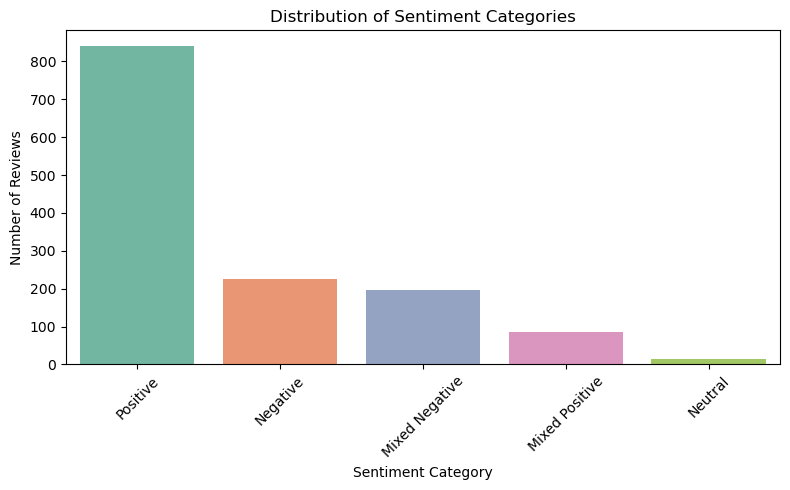

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
# Count plot of sentiment categories
plt.figure(figsize=(8, 5))
sns.countplot(data=reviews, x='SentimentCategory', order=reviews['SentimentCategory'].value_counts().index, palette='Set2')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sentiment Score vs Rating Scatter Plot

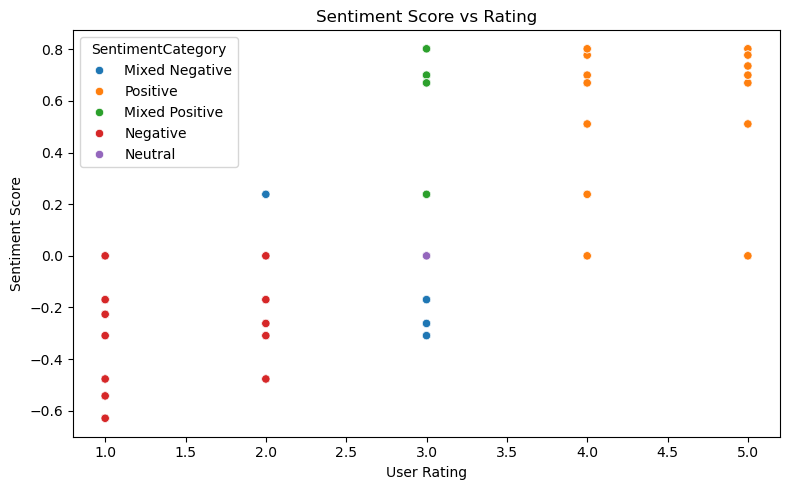

In [60]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=reviews, x='Rating', y='SentimentScore', hue='SentimentCategory', palette='tab10')
plt.title('Sentiment Score vs Rating')
plt.xlabel('User Rating')
plt.ylabel('Sentiment Score')
plt.tight_layout()
plt.show()

# Average Sentiment Score by Rating

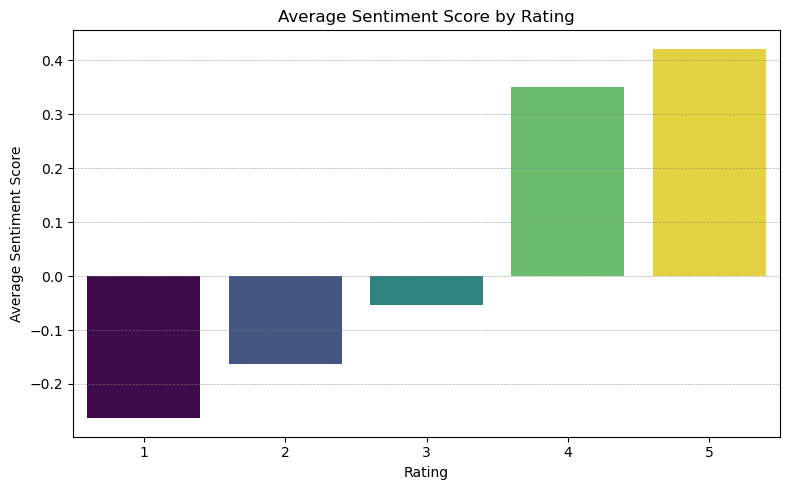

In [84]:
avg_sentiment_by_rating = reviews.groupby('Rating')['SentimentScore'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.title('Average Sentiment Score by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6, color='gray')
sns.barplot(
    data=avg_sentiment_by_rating,
    x='Rating',
    y='SentimentScore',
    hue='Rating',
    palette='viridis',
    legend=False 
)
plt.tight_layout()
plt.show()